# Use case 1: Oahu

First, we create the simulation file. For simplification it just reads data from sensors:

In [3]:
%%writefile ../data/input/simulations/oahu-basic-simulation.txt
DATETIME;COMMAND;ARGUMENTS
2010-03-20 07:30:00;CMD_ACTIVATE_SENSORS;DataCenter;Oahu;simulation.h5;
2010-03-23 10:30:00;CMD_PASSIVATE_SENSORS;DataCenter;Oahu;

Writing ../data/input/simulations/oahu-basic-simulation.txt


Now, let's simulate the previous file:

In [4]:
import random
import sys
from xdevs.sim import Coordinator
from xdevs import INFINITY
sys.path.insert(0, '../')
from models import SingleFarmOahu

random.seed(1975)
coupled = SingleFarmOahu("oahu-basic-simulation.txt", "../data")
coord = Coordinator(coupled)
coord.initialize()
coord.simulate_time(INFINITY)
coord.exit()

2023-02-14 17:53:48.341378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 17:53:48.425294: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-14 17:53:48.427999: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 17:53:48.428009: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Commander::o_cmd -> 2010-03-20 07:30:00;ACTIVATE_SENSORS
Sensor ap1: Processing data from 2010-03-20 ...
Sensor ap3: Processing data from 2010-03-20 ...
Sensor ap4: Processing data from 2010-03-20 ...
Sensor ap5: Processing data from 2010-03-20 ...
Sensor ap6: Processing data from 2010-03-20 ...
Sensor ap7: Processing data from 2010-03-20 ...
Sensor dh1: Processing data from 2010-03-20 ...
Sensor dh2: Processing data from 2010-03-20 ...
Sensor dh3: Processing data from 2010-03-20 ...
Sensor dh4: Processing data from 2010-03-20 ...
Sensor dh5: Processing data from 2010-03-20 ...
Sensor dh6: Processing data from 2010-03-20 ...
Sensor dh7: Processing data from 2010-03-20 ...
Sensor dh8: Processing data from 2010-03-20 ...
Sensor dh9: Processing data from 2010-03-20 ...
Sensor dh10: Processing data from 2010-03-20 ...
Sensor dh11: Processing data from 2010-03-20 ...
Sensor ap1: Processing data from 2010-03-21 ...
Sensor ap3: Processing data from 2010-03-21 ...
Sensor ap4: Processing data f

## Outliers detection

Secondly, we can detect outliers

In [5]:
%%writefile ../data/input/simulations/oahu-outliers.txt
DATETIME;COMMAND;ARGUMENTS
2010-03-23 18:10:00;CMD_FIX_OUTLIERS;DataCenter;Oahu;ap1;2010-03-22 07:30:00;2010-03-22 17:30:00;linear;simulation.h5;

Writing ../data/input/simulations/oahu-outliers.txt


We must run another simulation to detect and fix outliers:

Commander::o_cmd -> 2010-03-23 18:10:00;FIX_OUTLIERS
Fog server received command to fix outliers with arguments: ['DataCenter', 'Oahu', 'ap1', '2010-03-22 07:30:00', '2010-03-22 17:30:00', 'linear', 'simulation.h5'] ...
Reading H5 data ...
Preparing the model ...


17:54:38 - cmdstanpy - INFO - Chain [1] start processing
17:54:55 - cmdstanpy - INFO - Chain [1] done processing


Making prediction ...
The MAE for the model is 78.33521601708459
The MAPE for the model is 0.2526867412584017
Number of outliers: 0    34907
1     1093
Name: anomaly, dtype: int64


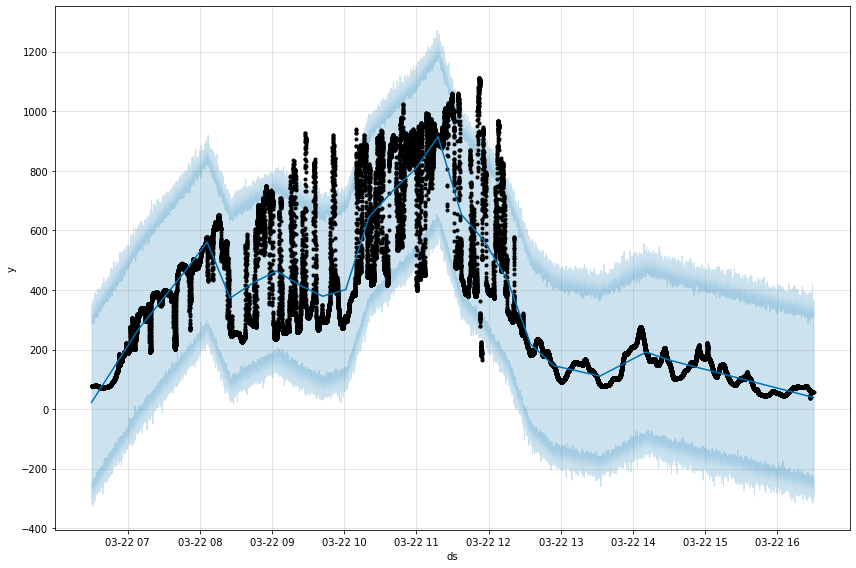

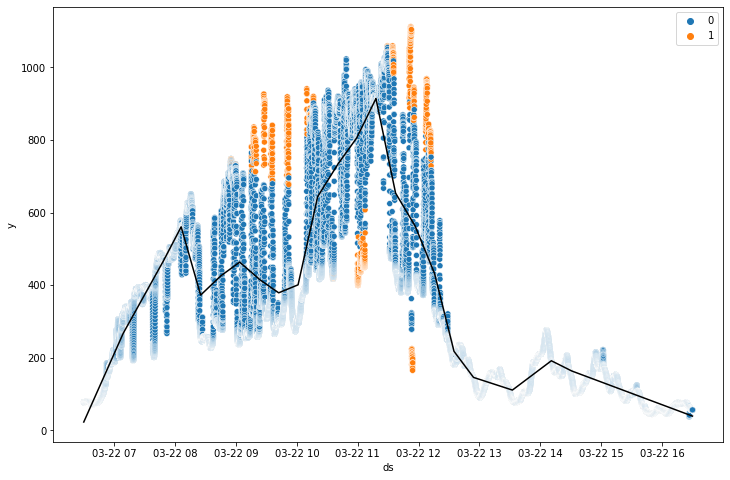

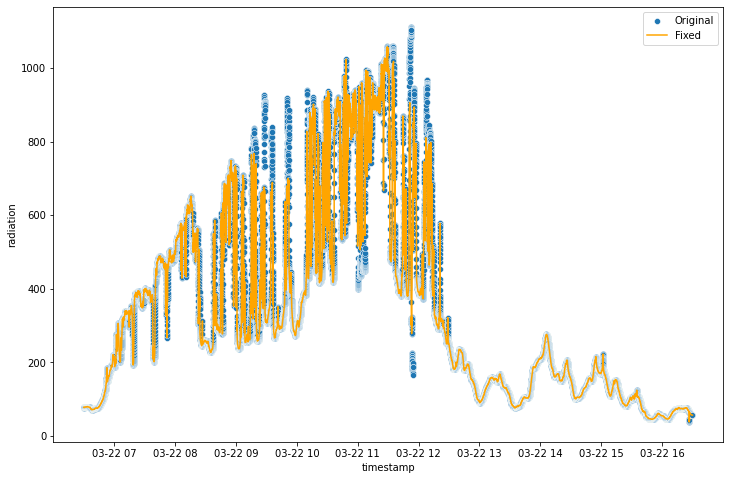

In [6]:
random.seed(1975)
coupled = SingleFarmOahu("oahu-outliers.txt", "../data")
coord = Coordinator(coupled)
coord.initialize()
coord.simulate_time(INFINITY)
coord.exit()

## Prediction service

Finally, we launch the prediction service repeating the process. Note that everything can be done using just one simulation file. However, we are splitting the process for simiplicity.

The simulation file to execute the prediction service is as follows. The first line transform the output of the simulation into an H5 file needed by the prediction library. Next, the inference itself is executed:

In [7]:
%%writefile ../data/input/simulations/oahu-prediction.txt
DATETIME;COMMAND;ARGUMENTS
2010-03-22 18:00:00;CMD_PREPARE_PREDICTION;DataCenter;Oahu;2010-03-22 07:30:00;2010-03-22 17:30:00;60;simulation.h5;prediction-input.h5;
2010-03-22 18:01:00;CMD_RUN_PREDICTION;DataCenter;Oahu;2010-03-22 07:30:00;2010-03-22 17:30:00;2010-03-22 16:00:00;510;prediction-input.h5;prediction-output.h5;

Writing ../data/input/simulations/oahu-prediction.txt


We are ready now to launch the simulation:

Commander::o_cmd -> 2010-03-22 18:00:00;PREPARE_PREDICTION
Fog server received command to generate the H5 file with arguments: ['DataCenter', 'Oahu', '2010-03-22 07:30:00', '2010-03-22 17:30:00', '60', 'simulation.h5', 'prediction-input.h5'] ...
Commander::o_cmd -> 2010-03-22 18:01:00;RUN_PREDICTION
Fog server received command to generate prediction with arguments: ['DataCenter', 'Oahu', '2010-03-22 07:30:00', '2010-03-22 17:30:00', '2010-03-22 16:00:00', '510', 'prediction-input.h5', 'prediction-output.h5'] ...


/home/jlrisco/.local/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning:

object name is not a valid Python identifier: '2010-03-22'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though

2023-02-14 17:55:56.026932: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-14 17:55:56.026950: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-14 17:55:56.026979: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc-toshiba): /proc/driver/nvidia/version does not exist
2023-02-14 17:55:56.027172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorF

Unable to forecast at times before 07:40 and after 16:29
Prediction successful! it took 00:00:05 in total


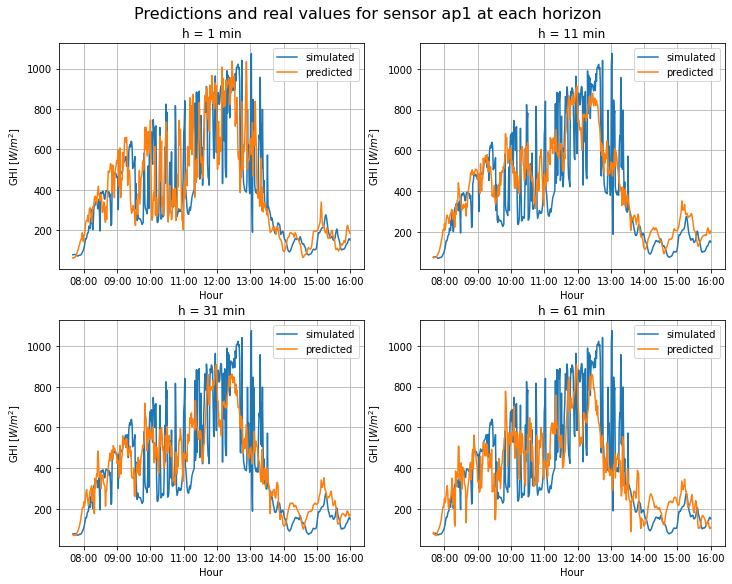

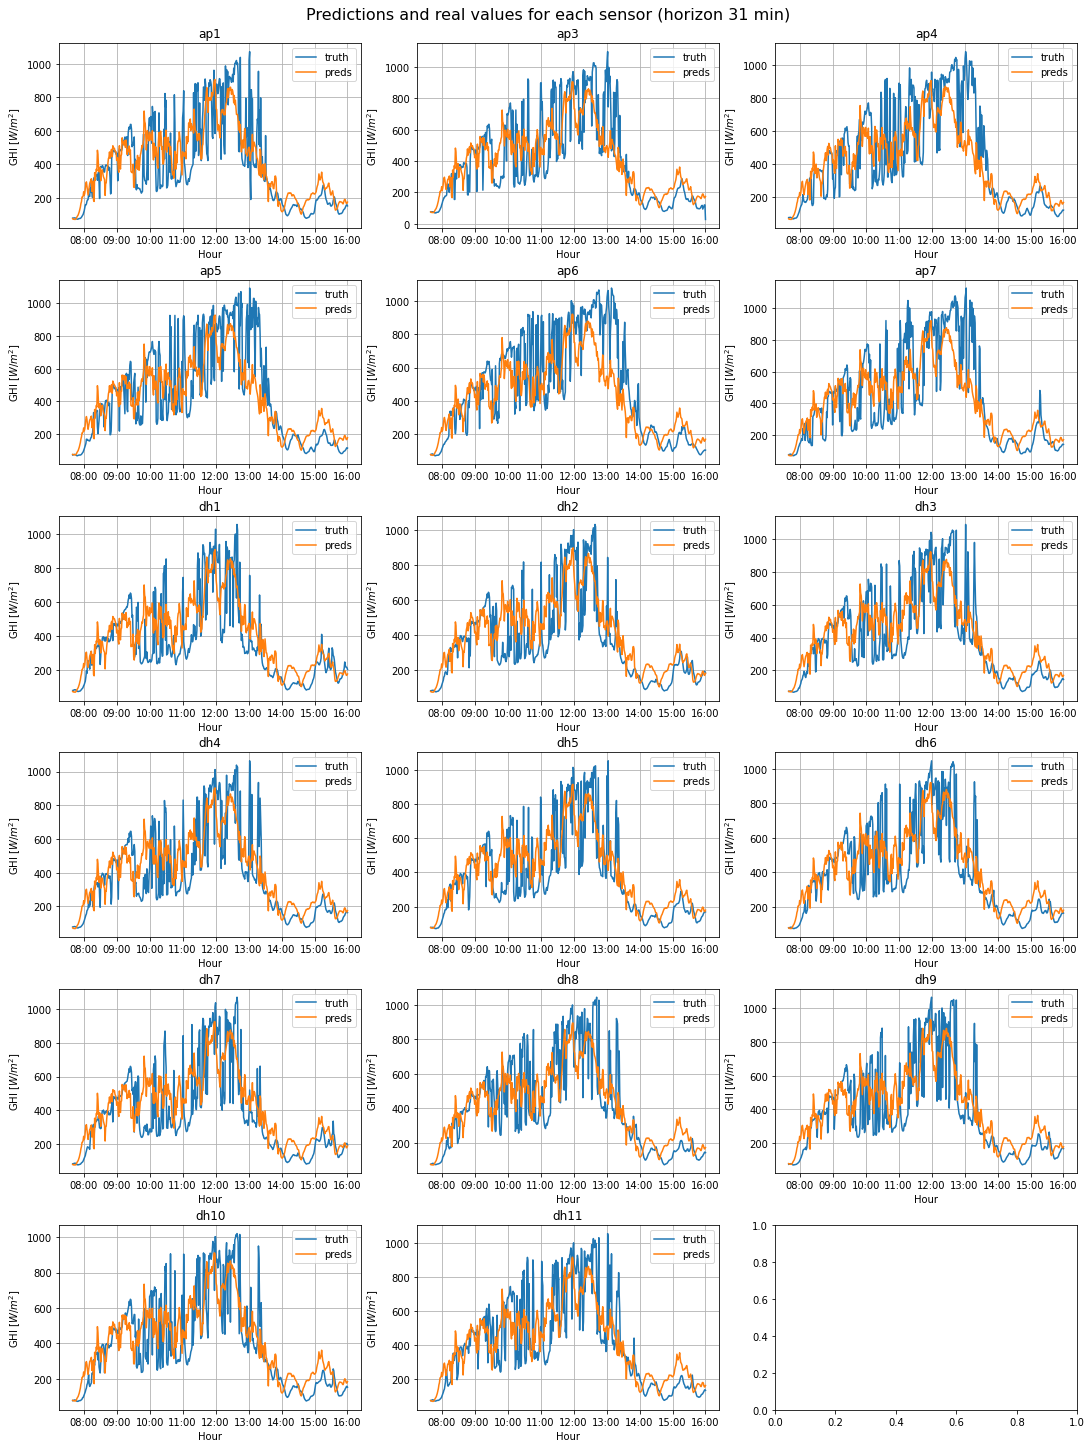

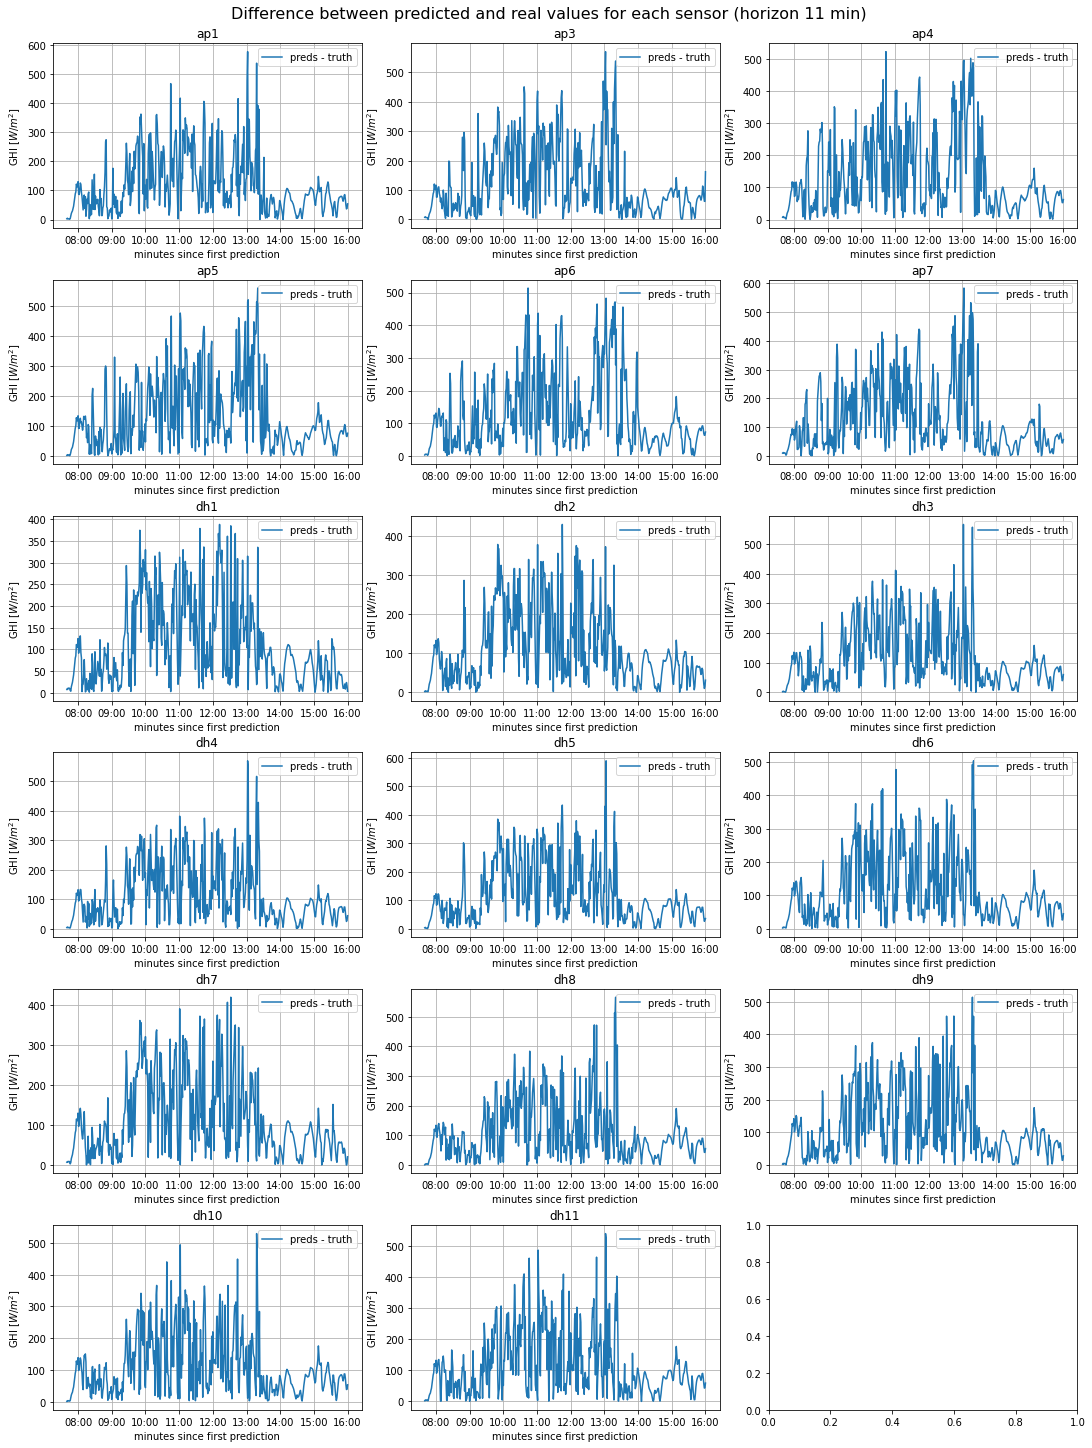

In [8]:
random.seed(1975)
coupled = SingleFarmOahu("oahu-prediction.txt", "../data")
coord = Coordinator(coupled)
coord.initialize()
coord.simulate_time(INFINITY)
coord.exit()